2000
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


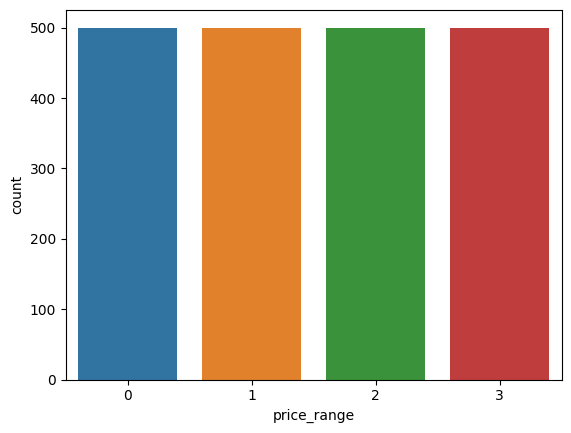

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
print(df.shape[0])
print(df.isna().sum())
print(df['price_range'].value_counts())

sns.countplot(df, x='price_range')
plt.show()

int64


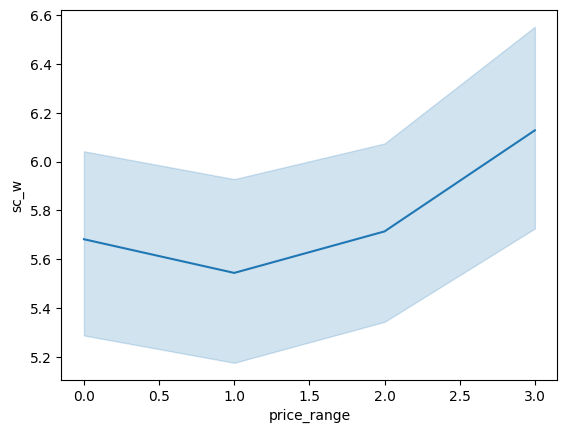

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64


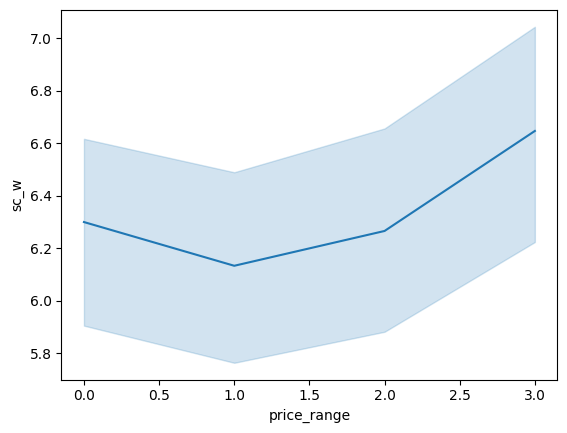

price_range
0    6.299335
1    6.132743
2    6.265351
3    6.646421
Name: sc_w, dtype: float64


In [2]:
print(df['sc_w'].dtype)

sns.lineplot(df, x='price_range', y='sc_w')
plt.show()

tmp = df.groupby('price_range')['sc_w']
print(tmp.mean())

df_clean = df[df['sc_w'] > 0]
sns.lineplot(df_clean, x='price_range', y='sc_w')
plt.show()

tmp = df_clean.groupby('price_range')['sc_w']
print(tmp.mean())

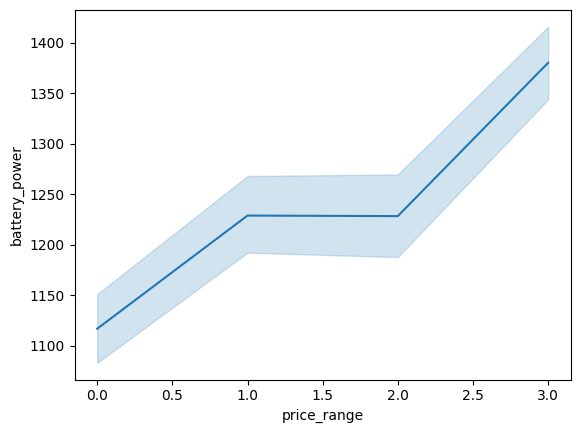

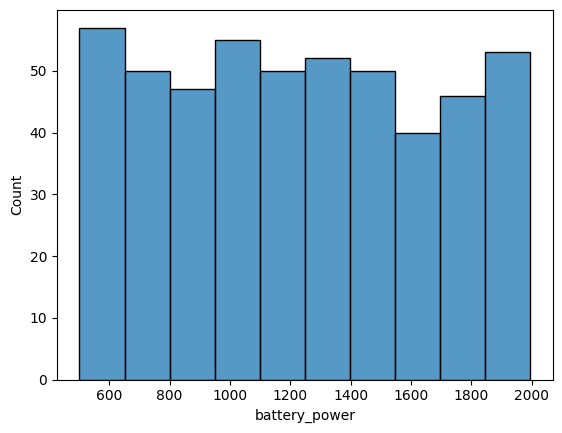

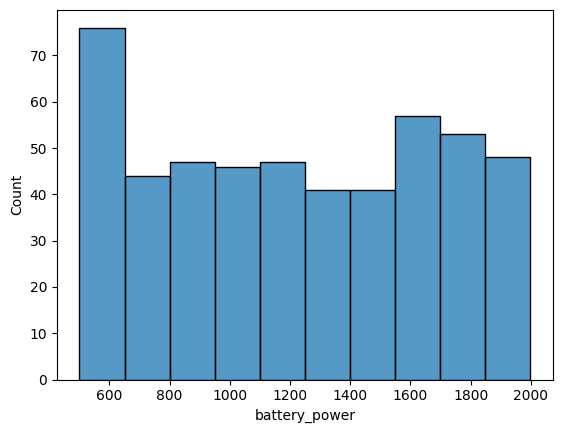

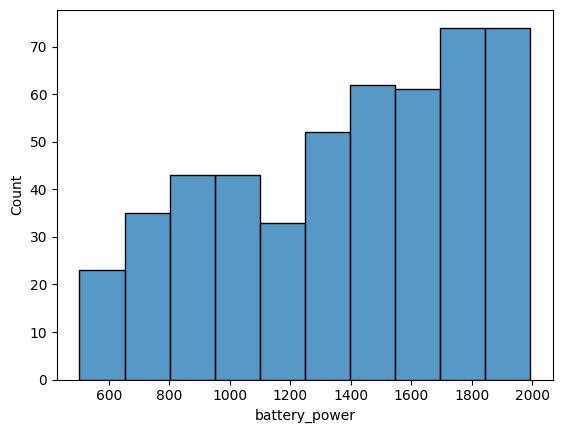

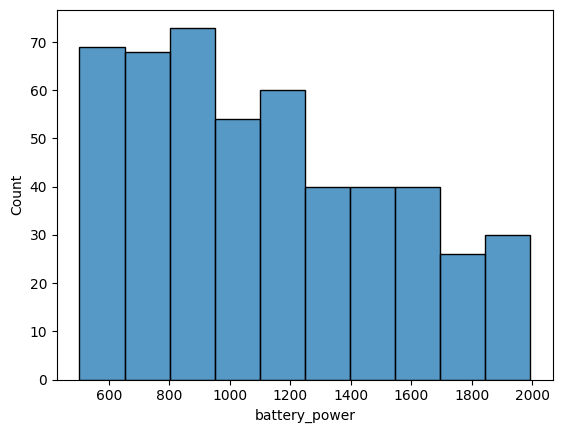

In [3]:
sns.lineplot(df, x='price_range', y='battery_power')
plt.show()

for i in df['price_range'].unique():
    df_price = df[df['price_range'] == i]
    sns.histplot(df_price, x='battery_power')
    plt.show()

In [4]:
df_4g = df[df['four_g'] == 1]
print(df_4g['three_g'].value_counts())

1    1043
Name: three_g, dtype: int64


In [5]:
print(df_4g[['blue','wifi']].value_counts())

blue  wifi
0     0       263
1     1       263
      0       260
0     1       257
dtype: int64


Predizione decision tree Test: 0.81 Train: 1.0


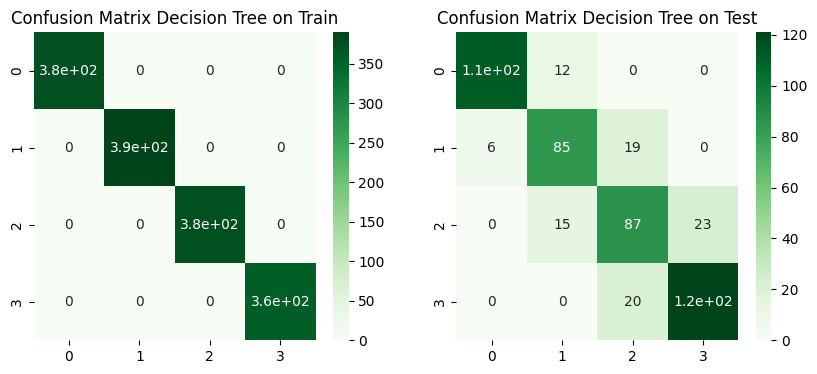

Predizione decision logistic Test: 0.65 Train: 0.6326666666666667


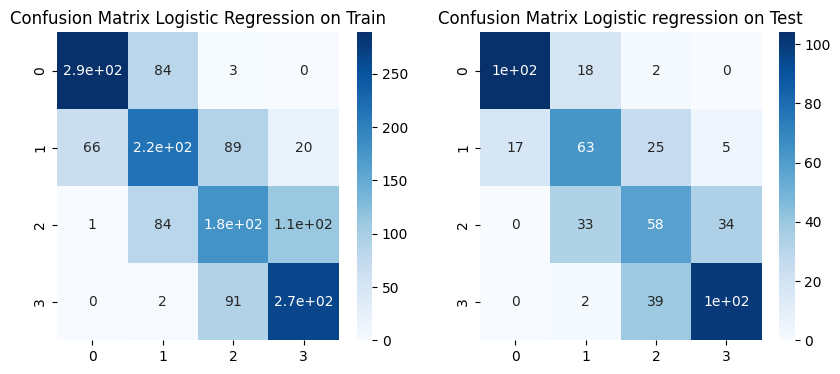

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/4, random_state=0)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix Decision Tree on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Greens', ax=axes[0])
axes[1].set_title('Confusion Matrix Decision Tree on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Greens', ax=axes[1])
plt.show()

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

test_pred1 = logreg.predict(X_test)
train_pred1 = logreg.predict(X_train)
print(f'Predizione decision logistic Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix Logistic Regression on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix Logistic regression on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues', ax=axes[1])
plt.show()

# Considerazioni:
Dall'accuracy notiamo come il decision tree overfitti nel training, si potrebbe valutare qualche tecnica come pruning per evitarlo. Al contrario la logistic regression non overfitta ma ha valori di accuracy più bassi nel test, cosiderando comunque che abbiamo 4 classi da predirre (0,1,2,3) dall'analisi della confusion matrix notiamo come gli errori sono circoscritti nelle classi vicine

In [7]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=10, scoring='accuracy').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.8365
Accuracy Logistic Regression con Cross Val  0.6395000000000001


L'accuracy è molto simile al punto 2.1 ma si nota un leggero miglioramento (0.3) per la decision tree mentre la logistic regression perde un po' di accuracy (0.2)

In [8]:
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['gini', 'entropy', 'log_loss', None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,4,5]
    }

gs = GridSearchCV(tree, param_grid=param, scoring='accuracy')

gs.fit(X_train,y_train)
test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs.best_params_)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

{'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 5}
Predizione decision tree Test: 0.666 Train: 0.9473333333333334


L'accuracy non migliora, c'è un peggioramento di più dello 0.1 

In [9]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

scaler.fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
tree.fit(Xs_train,y_train)

test_pred = tree.predict(Xs_test)
train_pred = tree.predict(Xs_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

Predizione decision tree Test: 0.808 Train: 1.0


In [10]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('discr', KBinsDiscretizer(n_bins=4), ['ram'])], remainder='passthrough')

temp = ct.fit_transform(X)
Xd = pd.DataFrame(temp, columns=ct.get_feature_names_out())

Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, test_size=1/4, random_state=0)

tree.fit(Xd_train, y_train)
test_pred = tree.predict(Xd_test)
train_pred = tree.predict(Xd_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

Predizione decision tree Test: 0.742 Train: 1.0
